In [1]:
import scanpy as sc
import scFates as scf

In [2]:
sc.set_figure_params()
scf.set_figure_pubready()

In [5]:
adata_all=sc.read("adata_processed.h5ad")
adata_sat=sc.read("adata_satglia.h5ad")
adata_glia=sc.read("../SS2/data/adata_assigned.h5ad")
adata=sc.read("adata_projected.h5ad")

In [8]:
adata_all.obs["sel"]=adata_all.obs_names.isin(adata_sat.obs_names).astype(str)

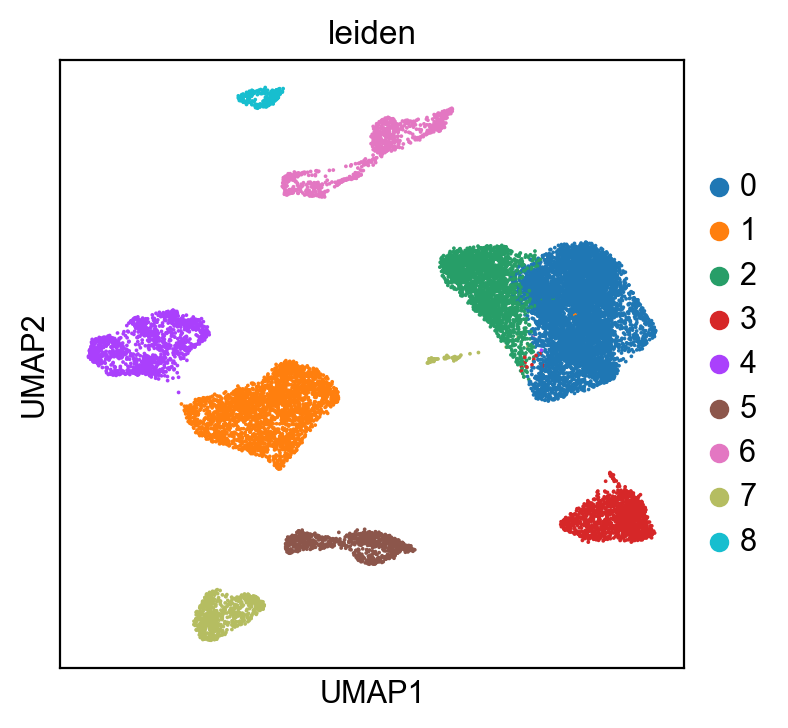

In [126]:
sc.pl.umap(adata_all,color="leiden")

In [129]:
dat=adata_all.obsm["X_umap"][adata_all.obs.leiden.isin(["0","2"]),:]

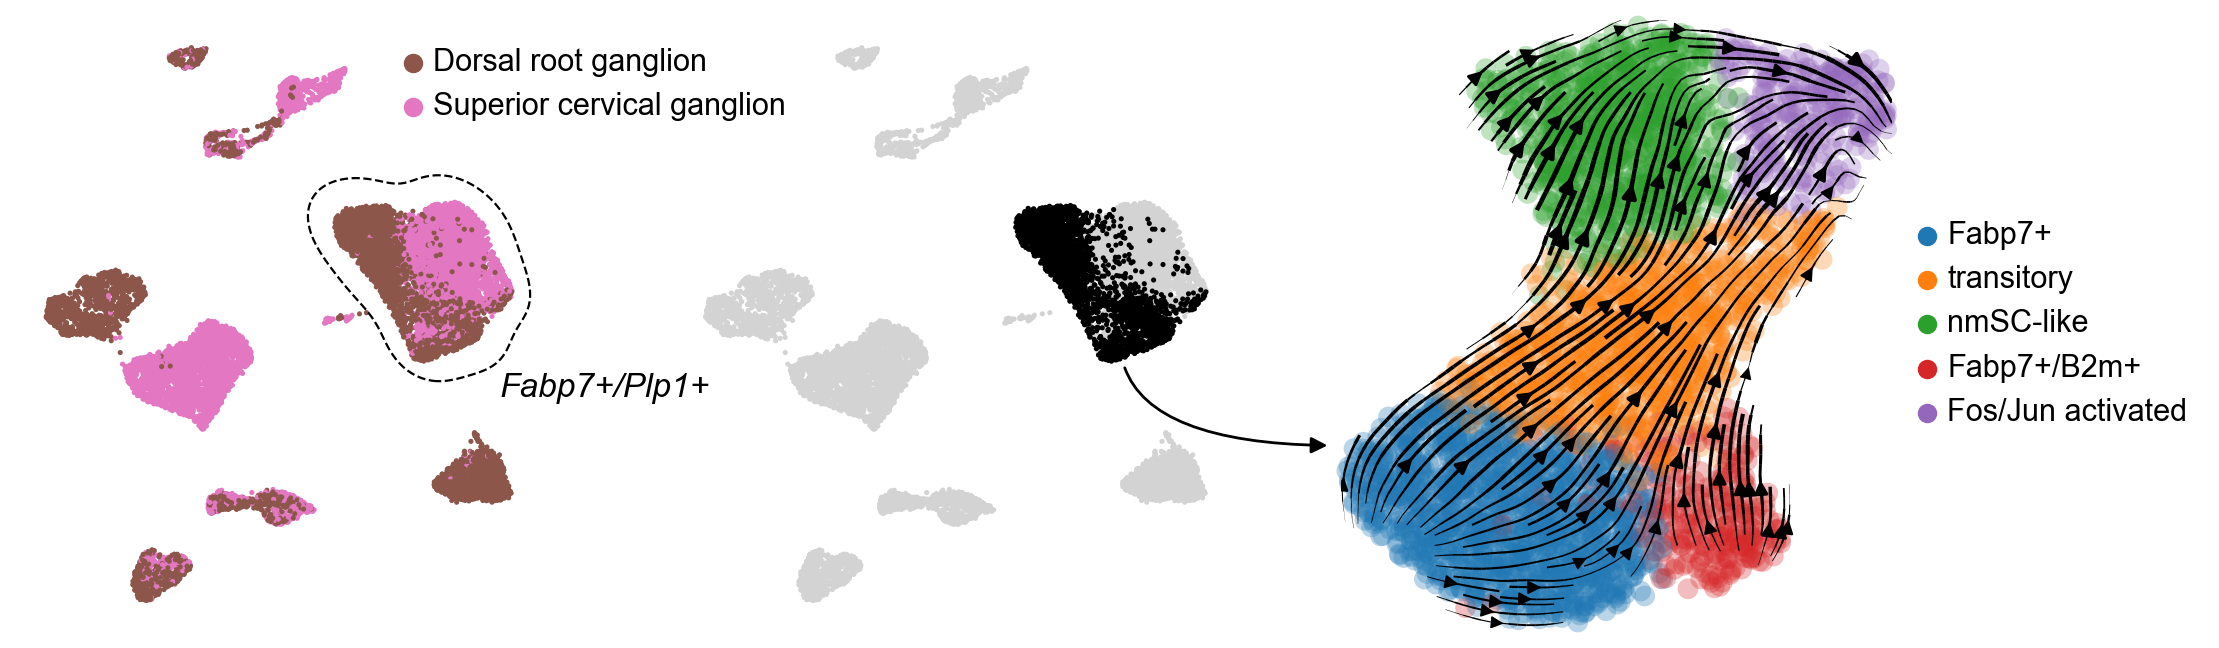

In [151]:
import matplotlib.pyplot as plt
import scvelo as scv
import seaborn as sns
scv.set_figure_params(figsize=(4,4))
fig, axs = plt.subplots(1,3,figsize=(12,4))
scv.pl.umap(adata_all,color="location",title="",ax=axs[0],legend_loc="none",show=False,palette=["tab:brown","tab:pink"])
sns.kdeplot(dat[:,0],dat[:,1],levels=1,ax=axs[0],bw=.5,thresh=.02,
            linestyles="--",linewidths=.8,colors="k")
axs[0].annotate("Fabp7+/Plp1+",(0.87,0.38),xycoords="axes fraction",style="italic")
scv.pl.umap(adata_all,color="sel",groups=["True"],title="",palette=["k","k"],legend_loc="none",ax=axs[1],show=False)
scv.pl.velocity_embedding_stream(adata, basis='umap',title="",color="annotations",legend_loc="right",clip_on=False,show=False,ax=axs[2])
axs[0].legend(bbox_to_anchor=(.65, 1),frameon=False)



axs[1].annotate("",
                xy=(0.8, .45), xycoords='axes fraction',
                xytext=(1.2, .3), textcoords='axes fraction',
                arrowprops=dict(arrowstyle="<|-", color="k",
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="angle3,angleA=0,angleB=100",
                                ),
                )

axs[2].set_rasterized(True)
plt.savefig("figures/supp_a.pdf",dpi=300)

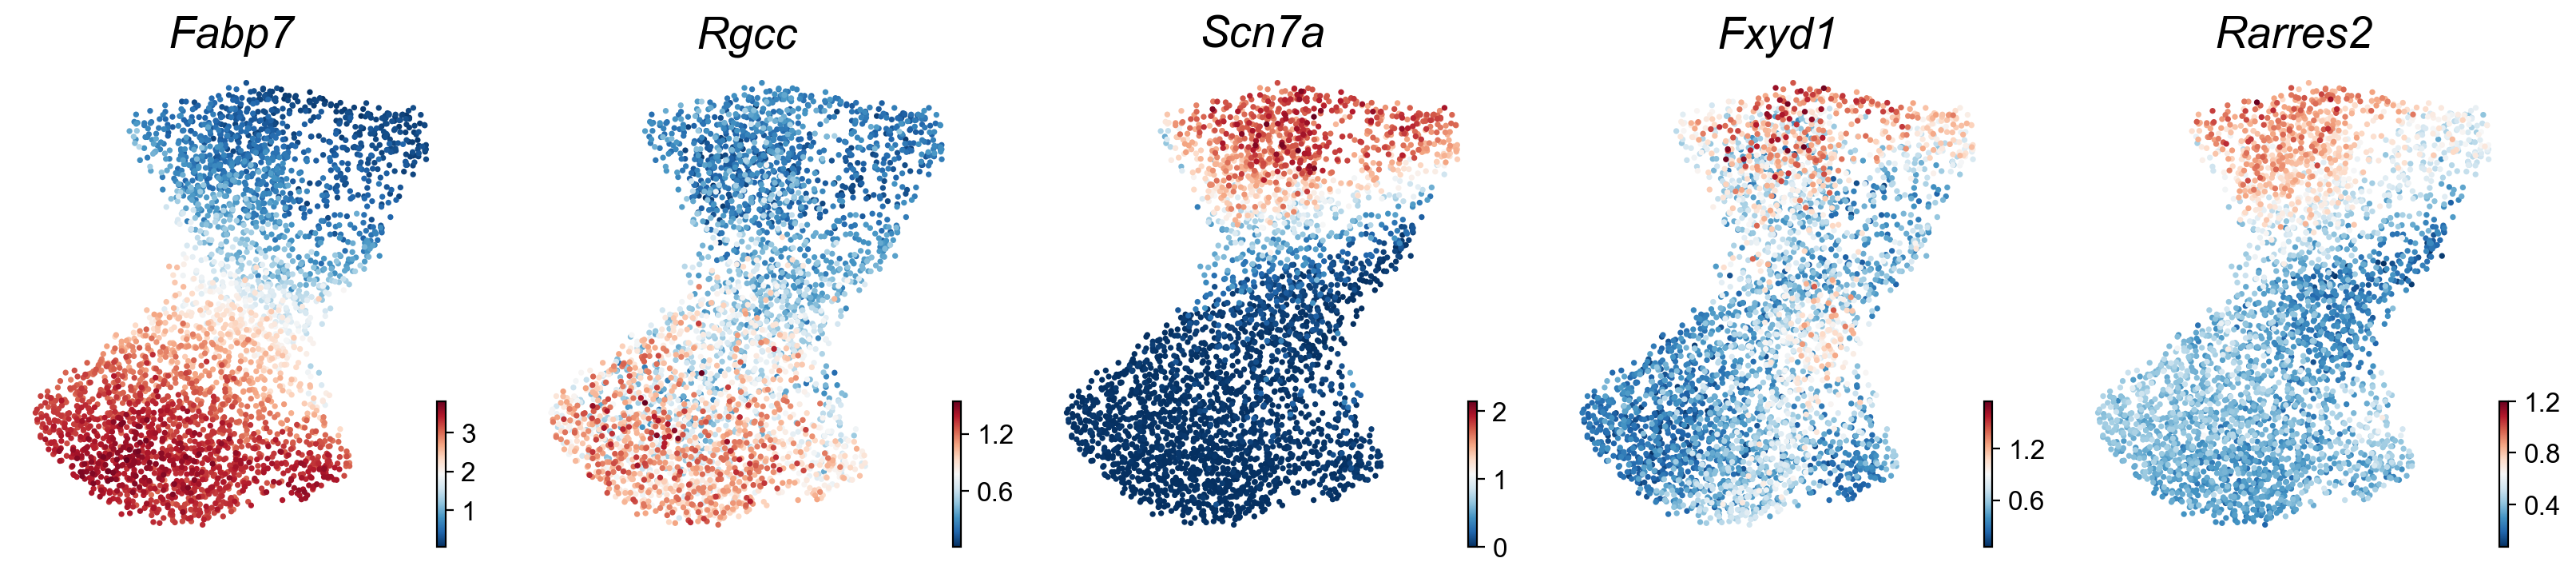

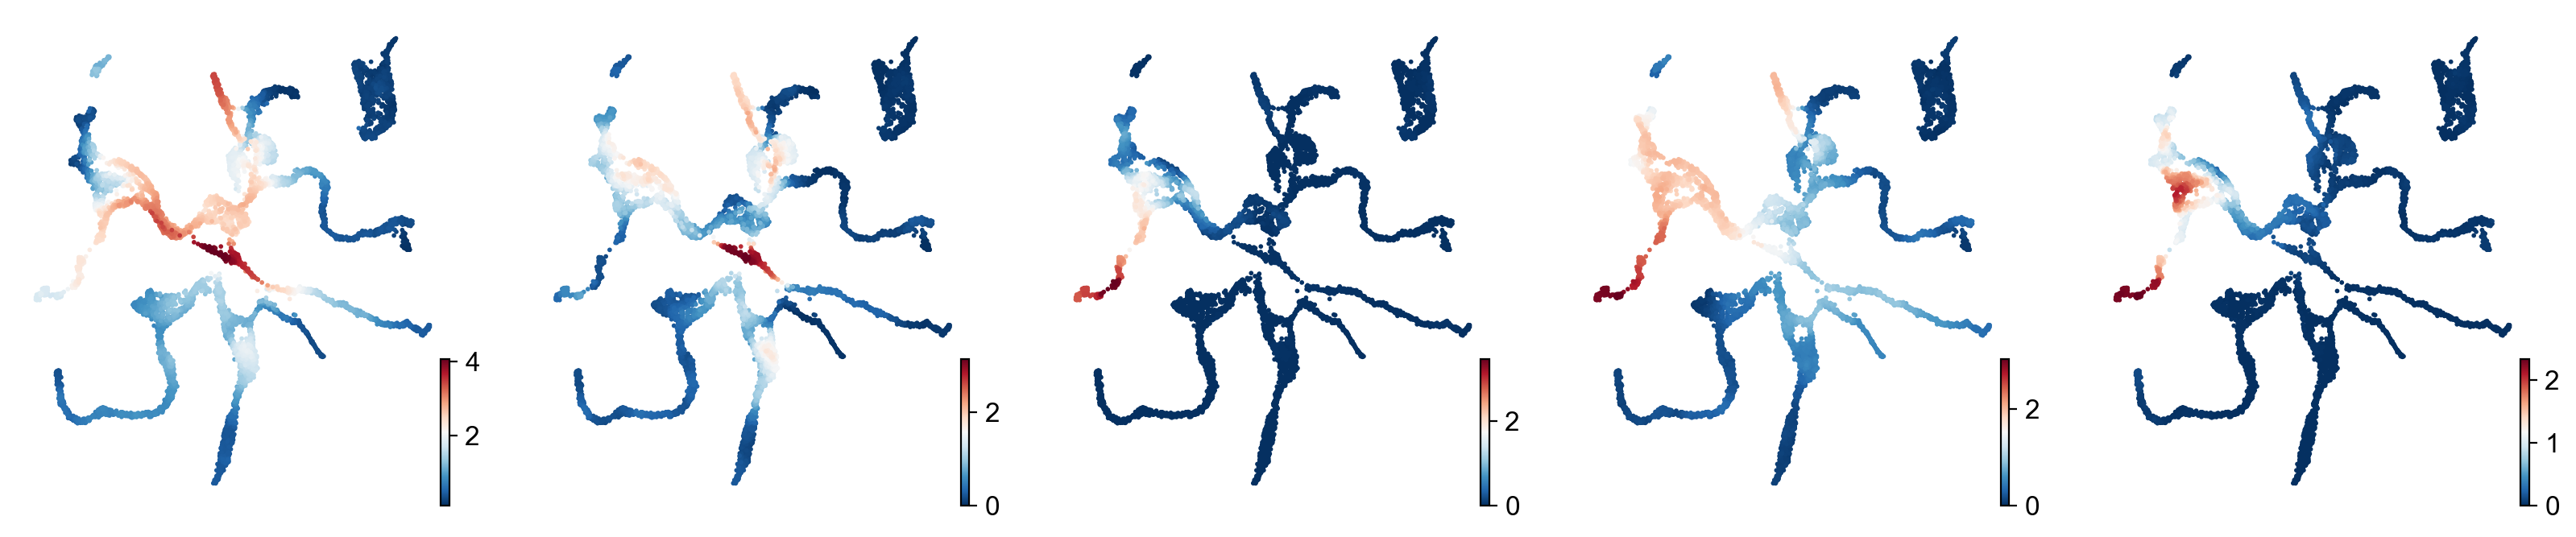

In [118]:
axs=scv.pl.umap(adata,color=["Fabp7","Rgcc","Scn7a","Fxyd1","Rarres2"],smooth=True,show=False)
for ax in axs:
    ax.set_title(ax.get_title(),style="italic",size=20)
plt.savefig("figures/supp_b1.pdf",dpi=300)
scv.pl.umap(adata_glia,color=["Fabp7","Rgcc","Scn7a","Fxyd1","Rarres2"],title="",smooth=True,show=False)
plt.savefig("figures/supp_b2.pdf",dpi=300)

In [119]:
import pandas as pd
UMAP=pd.read_csv("UMAP_projected.csv",index_col=0)
adata_sat=adata_sat[UMAP.index]
adata_sat.obsm["X_umap"]=UMAP.values

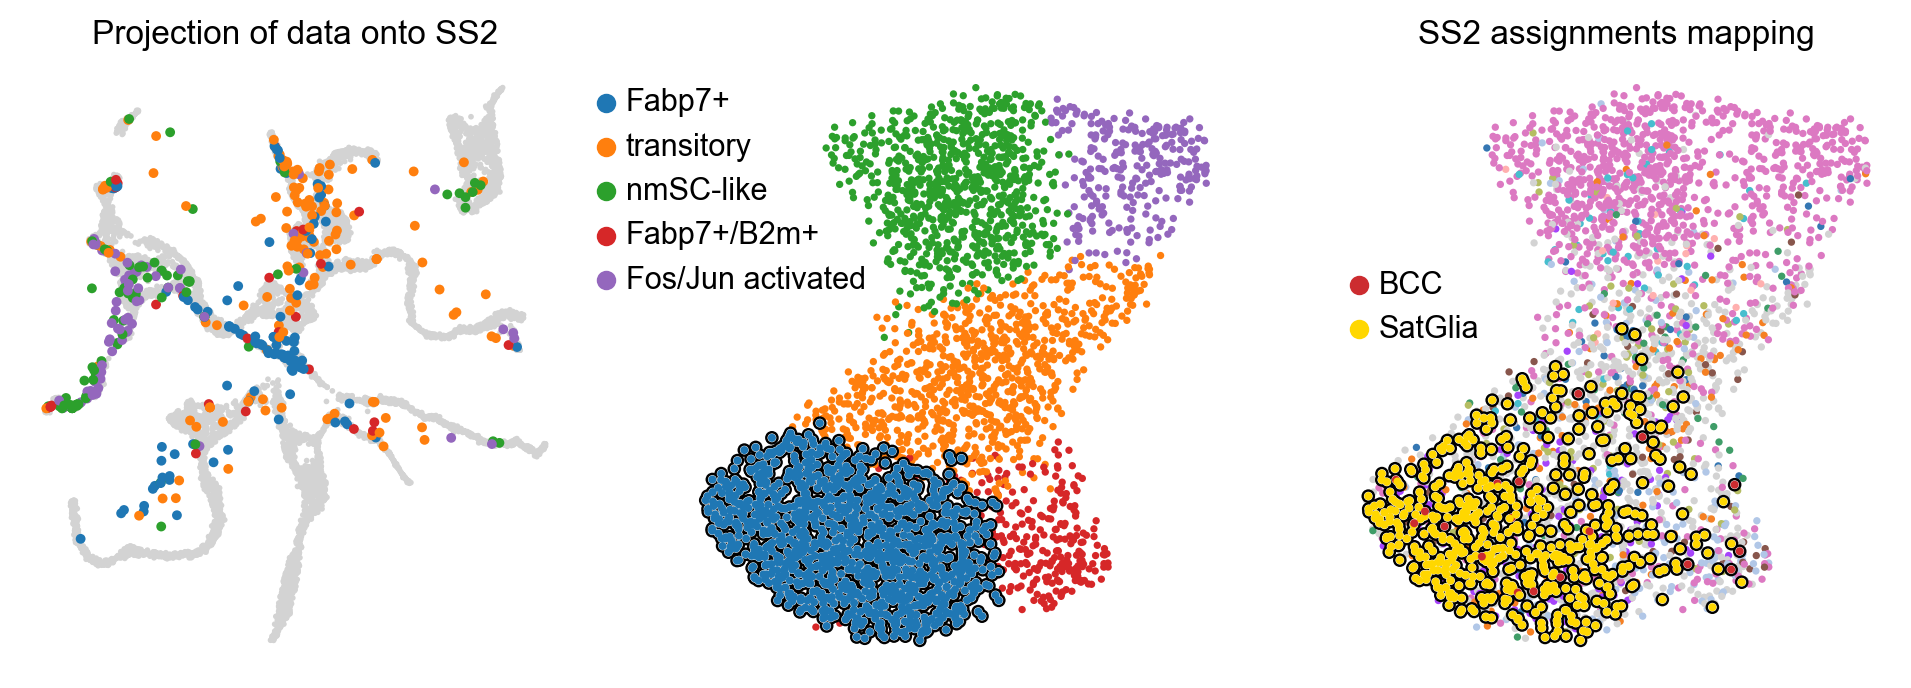

In [ ]:
scv.set_figure_params(figsize=(4,4))

fig, axs = plt.subplots(1,3,figsize=(12,4))
scv.pl.umap(adata_glia,color="lightgrey",show=False,ax=axs[0])
scv.pl.umap(adata_sat,color="annotations",ax=axs[0],title="Projection of data onto SS2",frameon=False,s=50,show=False,legend_loc="upper right")

scv.pl.scatter(adata,color=["assignments_proj"],title="SS2 assignments mapping",legend_loc="none",add_outline=["BCC","SatGlia"],show=False,ax=axs[2])
axs[2].legend(bbox_to_anchor=(.3, .7),frameon=False)
scv.pl.scatter(adata,color=["annotations"],title="",add_outline=["Fabp7+"],legend_loc="none",show=False,ax=axs[1])
plt.savefig("figures/supp_c.pdf",dpi=300)

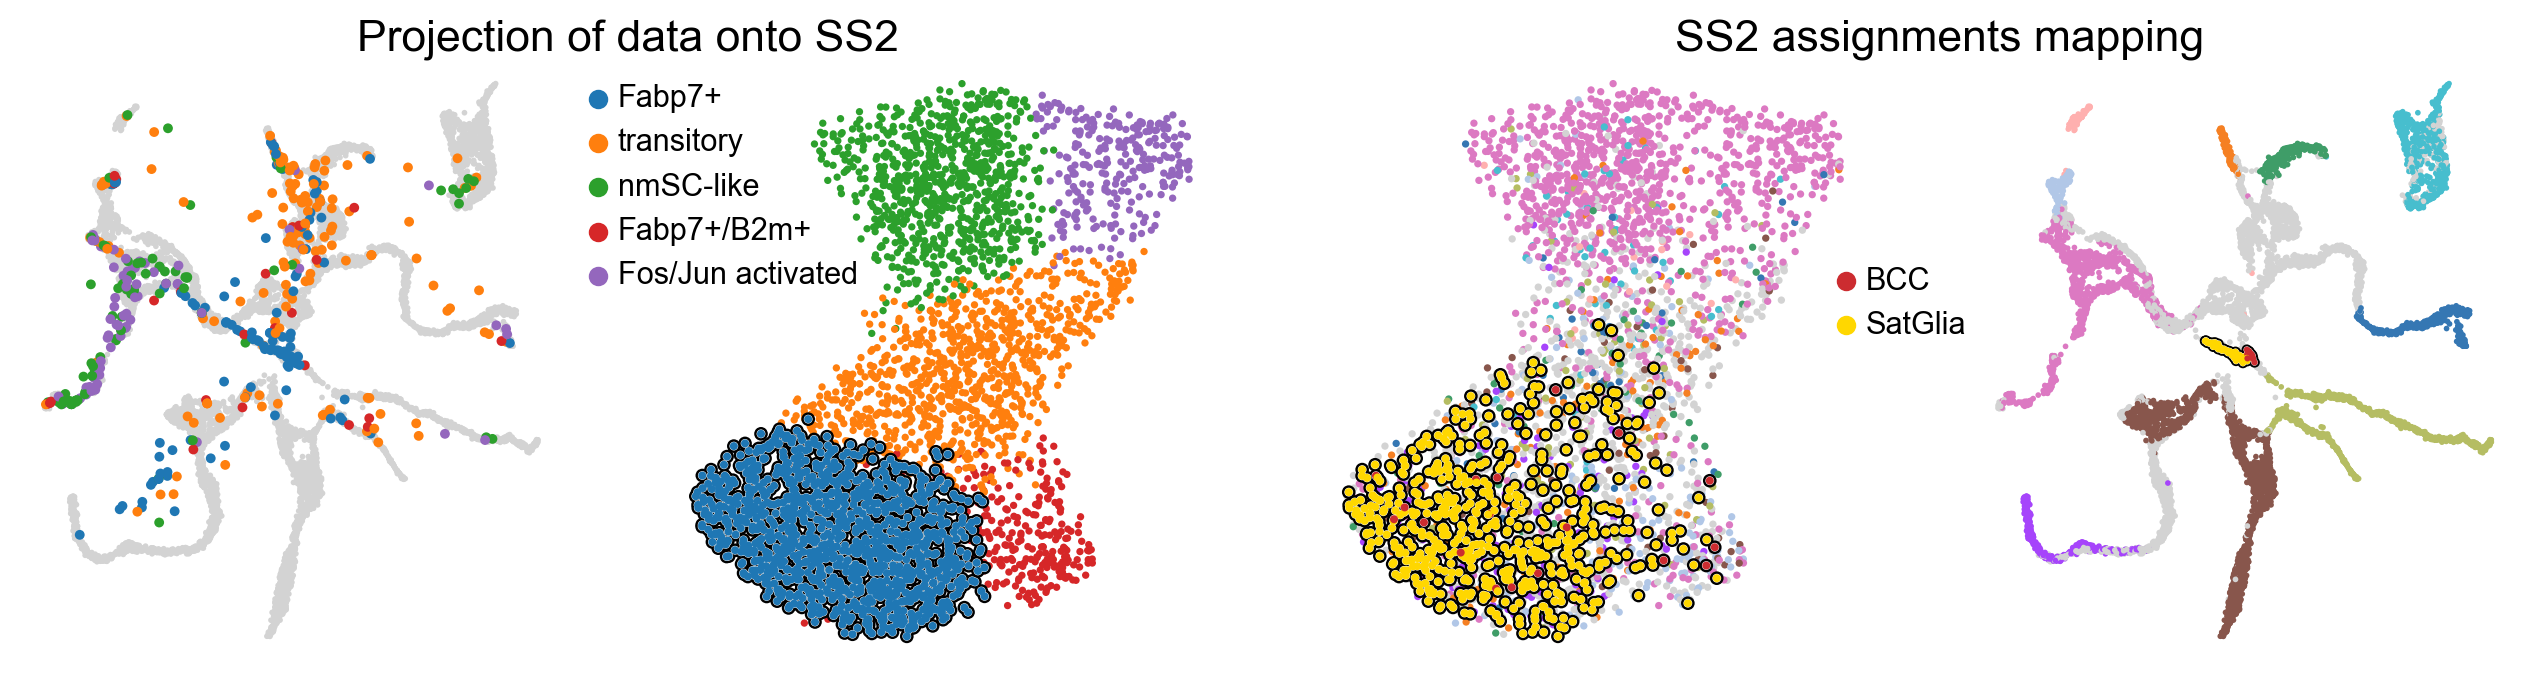

In [171]:
scv.set_figure_params(figsize=(4,4))

fig, axs = plt.subplots(1,4,figsize=(16,4))
scv.pl.umap(adata_glia,color="lightgrey",show=False,ax=axs[0])
scv.pl.umap(adata_sat,color="annotations",ax=axs[0],title="",frameon=False,s=50,show=False,legend_loc="upper right")

scv.pl.scatter(adata,color=["assignments_proj"],title="",legend_loc="none",add_outline=["BCC","SatGlia"],show=False,ax=axs[2])
axs[2].legend(bbox_to_anchor=(.9, .7),frameon=False)
scv.pl.scatter(adata,color=["annotations"],title="",add_outline=["Fabp7+"],legend_loc="none",show=False,ax=axs[1])
scv.pl.umap(adata_glia,color="assignments",add_outline=["BCC","SatGlia"],show=False,ax=axs[3],legend_loc="none",title="")
fig.text(s='Projection of data onto SS2', x=0.37, y=0.93, fontsize=16, ha='center', va='center')
fig.text(s='SS2 assignments mapping', x=0.78, y=0.93, fontsize=16, ha='center', va='center')
plt.savefig("figures/supp_c.pdf",dpi=300)



In [172]:
fname="Appendix_4_satglia"

In [177]:
%%bash -s $fname
cat<<EOF >$1.tex
\documentclass{article}
\usepackage[paperheight=240mm,paperwidth=210mm]{geometry}
 \geometry{
 left=5mm,
 right=5mm,
 top=5mm,
 bottom=5mm,
 }

\usepackage[labelfont=bf]{caption}
\usepackage{multirow}
\usepackage[rgb]{xcolor}
\usepackage{fontspec}
\usepackage[utf8]{inputenc}
\usepackage[T1]{fontenc}
\usepackage{graphicx} 
\begin{document}
\setmainfont{Arial}

\definecolor{Blue}{RGB}{50, 49, 145}

\noindent
\large 


\raggedright \textbf{A} \textcolor{Blue}{Extraction and analysis of DRG satellite glia from Mapps, Aurelia A \textit{et al.}}
\includegraphics[width=1\textwidth]{figures/supp_a.pdf}

\raggedright \textbf{B} \textcolor{Blue}{Overlap of markers between the two datasets}
\includegraphics[width=1\textwidth]{figures/supp_b1.pdf}
\includegraphics[width=1\textwidth]{figures/supp_b2.pdf}

\raggedright \textbf{C} \textcolor{Blue}{Validation of SS2 satellite glia via integration, projection and label transfer}
\includegraphics[width=1\textwidth]{figures/supp_c.pdf}

\hfill
\clearpage


EOF

echo "\end{document}" >> $1.tex

xelatex --shell-escape $1.tex
rm $1.tex
convert -flatten -density 300 $1.pdf $1.jpg
identify $1.pdf

This is XeTeX, Version 3.14159265-2.6-0.999991 (TeX Live 2019/Debian) (preloaded format=xelatex)
 \write18 enabled.
entering extended mode
(./suppfig_satglia.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/caption/caption.sty
(/usr/share/texlive/texmf-dist/tex/latex/caption/caption3.sty))
(/usr/share/texlive/texmf-dist/tex/latex/multirow/multirow.sty)
(/usr/share/texlive/texmf-dist/tex/latex/xcolor/xcolor.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics-cfg/color.cfg)
(/usr/share/texlive/t

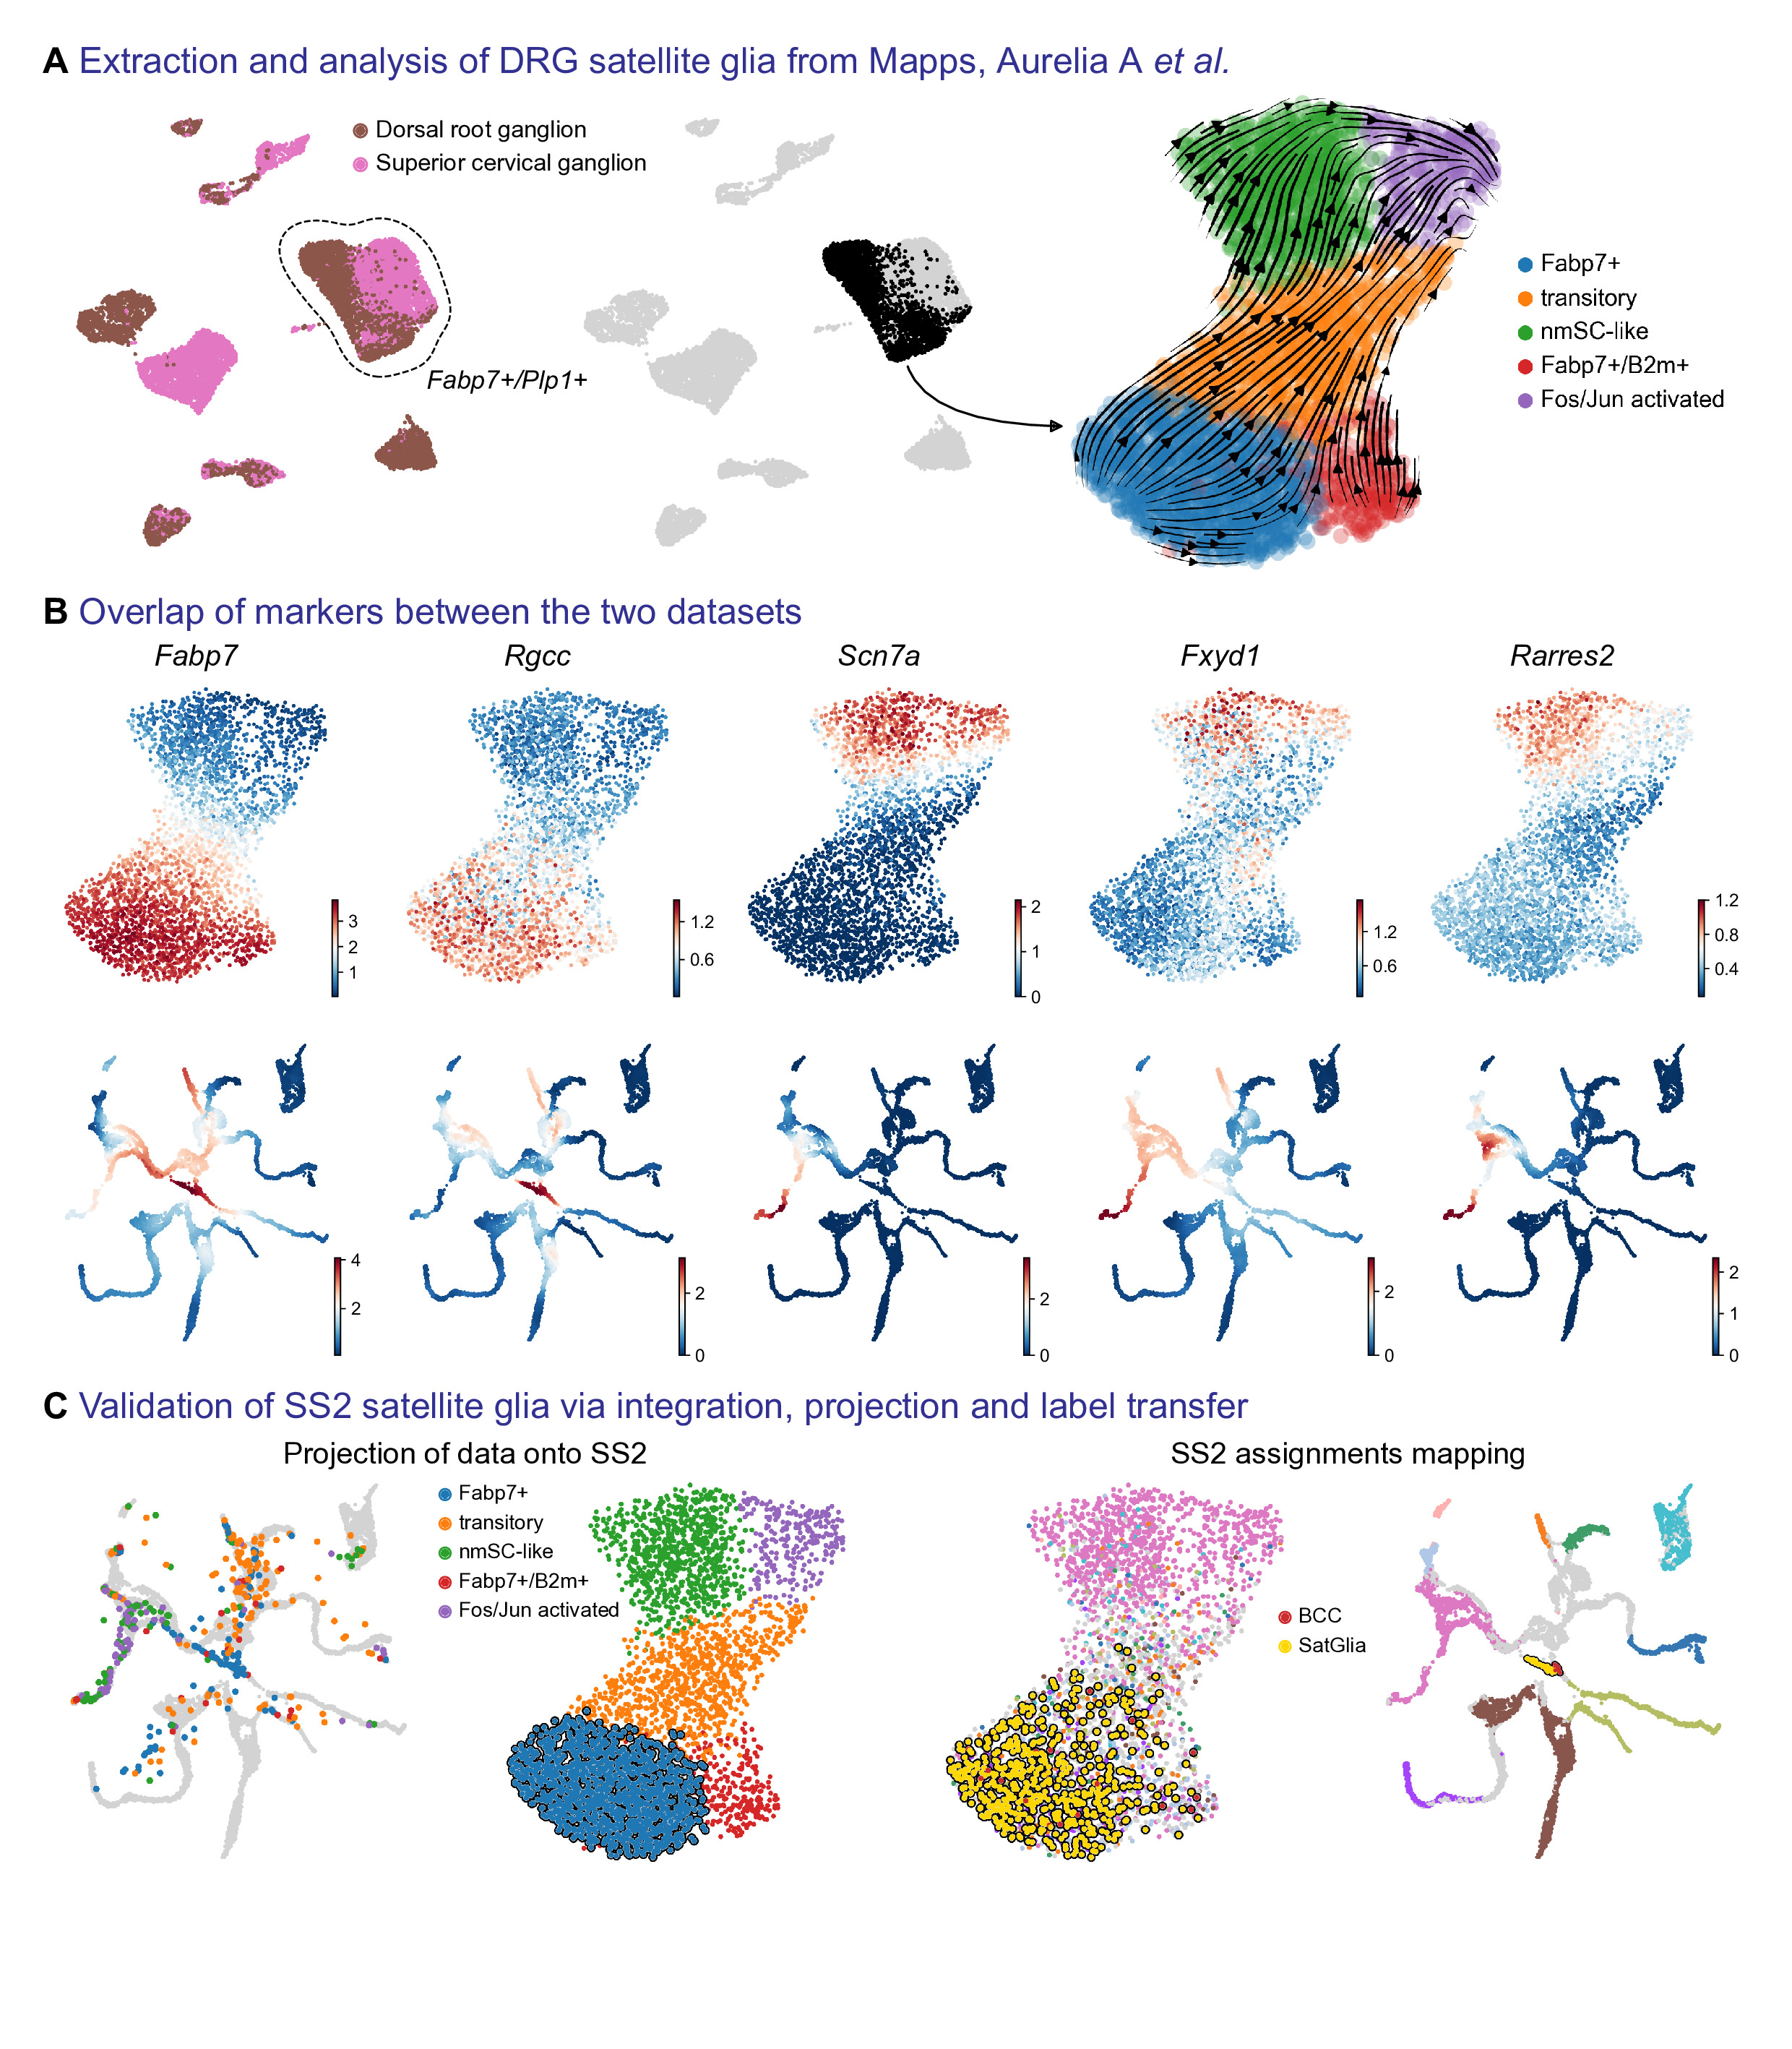

In [178]:
from IPython.display import Image
Image(filename=fname+'.jpg') 